In [6]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Segway equation and simulations derivation from Main Equations

First list the main equations of the Segway system:

$$
\begin{align}
\omega_1 &:= \dot{\vartheta}, \\
\omega_2 &:= \dot{\varphi} + \dot{\psi} \sin \vartheta, \\
\omega_3 &:= \dot{\psi} \cos \vartheta, \\
\sigma_r &:= \dot{r} - \dot{\vartheta} R, \\
\sigma_\gamma &:= \dot{\gamma}h + \dot{\varphi} R \cos \gamma + \dot{\psi} (h + R \cos \gamma) \sin \vartheta,
\end{align}
$$

$$
\begin{align}
\dot{x}_C &= \omega_1 R \sin \psi \cos \vartheta + \omega_2 R \cos \psi, \\
\dot{y}_C &= -\omega_1 R \cos \psi \cos \vartheta + \omega_2 R \sin \psi, \\
\dot{\psi} &= \frac{\omega_3}{\cos \vartheta}, \\
\dot{\vartheta} &= \omega_1, \\
\dot{\varphi} &= \omega_2 - \omega_3 \tan \vartheta, \\
\dot{r} &= \sigma_r + \omega_1 R, \\
\dot{\gamma} &= \sigma_\gamma  \frac{1}{h} - \omega_2 \frac{R}{h} \cos \gamma - \omega_3 \tan \vartheta,
\end{align}
$$

Given the Segway system, we have the following assumptions:
- The Segway is moving in a straight line, so $\dot{\vartheta} = \vartheta = 0$, $\dot{\psi} = \psi = 0$.

Plugin the assumptions into the main equations, we have:
$$
\begin{align}
\omega_1 &:= 0, \\
\omega_2 &:= \dot{\varphi}, \\
\omega_3 &:= 0, \\
\sigma_r &:= 0, \\
\sigma_\gamma &:= \dot{\gamma}h + \dot{\varphi} R \cos \gamma + \dot{\psi} (h + R \cos \gamma) \sin 0 = \dot{\gamma}h + \dot{\varphi} R \cos \gamma,
\end{align}
$$

And also:

$$
\begin{align}
\dot{x}_C &= \omega_1 R \sin 0 \cos 0 + \omega_2 R \cos 0 = \dot{\varphi} R, \\
\dot{y}_C &= -\omega_1 R \cos 0 \cos 0 + \omega_2 R \sin 0 = 0, \\
\dot{\psi} &= \frac{\omega_3}{\cos 0} = 0, \\
\dot{\vartheta} &= \omega_1 = 0, \\
\dot{\varphi} &= \omega_2 - \omega_3 \tan 0 = \dot{\varphi}, \\
\dot{r} &= \sigma_r + \omega_1 R = 0, \\
\dot{\gamma} &= \sigma_\gamma  \frac{1}{h} - \omega_2 \frac{R}{h} \cos \gamma - \omega_3 \tan 0 = \dot{\gamma},
\end{align}
$$

We can extract only the most relevant equations, which are:
$$
\begin{align}
\dot{x}_C &= \dot{\varphi} R, \\
\sigma_\gamma &:= \dot{\gamma}h + \dot{\varphi} R \cos \gamma, \\
\end{align}
$$

The core equations of constraints is thus:
$$
\begin{align}
\dot{\gamma} &= \sigma_\gamma  \frac{1}{h} - \dot{\varphi} \frac{R}{h} \cos \gamma,
\end{align}
$$

## Force and Torques

After deriving the constraints equations, we can also need to derive the force and torques before modelling the complete the Segway system.

To derive the relationship, we can apply Lagrangian:

- Let $q = [x_C, \gamma]$ be the generalized coordinates.


Positions of the pendulum:

$$
\begin{align}
x_q &= x_C + h \sin \gamma, \\
y_q &= h \cos \gamma,
\end{align}
$$

Velocities and accelerations of the pendulum:
$$
\begin{align}
\dot{x}_q &= \dot{x}_C + h \dot{\gamma} \cos \gamma, \\
\dot{y}_q &= -h \dot{\gamma} \sin \gamma, \\
\ddot{x}_q &= \ddot{x}_C + h \ddot{\gamma} \cos \gamma - h \dot{\gamma}^2 \sin \gamma, \\
\ddot{y}_q &= -h \ddot{\gamma} \sin \gamma - h \dot{\gamma}^2 \cos \gamma,
\end{align}
$$

Velocities and accelerations of the wheel:
$$
\begin{align}\dot{x}_w &= \dot{x}_C, \\
\dot{y}_w &= 0, \\
\ddot{x}_w &= \ddot{x}_C, \\
\ddot{y}_w &= 0,
\end{align}
$$

Kenetic energy of the system:
$$
\begin{align}
T &= \frac{1}{2} m (\dot{x}_C^2 + \dot{y}_C^2) + \frac{1}{2} I \dot{\gamma}^2 + \frac{1}{2} m_w (\dot{x}_w^2 ) \\
&= \frac{1}{2} m \left( (\dot{x}_C + h \dot{\gamma} \cos \gamma)^2 + (-h \dot{\gamma} \sin \gamma)^2 \right) + \frac{1}{2} I \dot{\gamma}^2 + \frac{1}{2} m_w \dot{x}_C^2 \\
&= \frac{1}{2} m \left( \dot{x}_C^2 + 2 h \dot{x}_C \dot{\gamma} \cos \gamma + h^2 \dot{\gamma}^2 \right) + \frac{1}{2} I \dot{\gamma}^2 + \frac{1}{2} m_w \dot{x}_C^2 \\
&= \frac{1}{2} (m + m_w) \dot{x}_C^2 + m h \dot{x}_C \dot{\gamma} \cos \gamma + \frac{1}{2} (m h^2 + I) \dot{\gamma}^2,
\end{align}
$$

Potential energy of the system(only the pendulum has potential energy):
$$
\begin{align}
V &= m g y_q \\
&= m g h \cos \gamma,
\end{align}
$$

Apply Lagrangian:
$$
\begin{align}
L &= T - V \\
&= \frac{1}{2} (m + m_w) \dot{x}_C^2 + m h \dot{x}_C \dot{\gamma} \cos \gamma + \frac{1}{2} (m h^2 + I) \dot{\gamma}^2 - m g h \cos \gamma,
\end{align}
$$

For each generalized coordinate:
$$
\begin{align}\frac{d}{dt} \left( \frac{\partial L}{\partial \dot{q}_i} \right) - \frac{\partial L}{\partial q_i} &= Q_i,
\end{align}
$$

Here $q[0] = x_C$, $q[1] = \gamma$, thus $Q_1 = M/R$ (torque applied to the wheel) and $Q_2 = -M$ (torque applied to the pendulum, equal in magnitude but opposite in direction to the torque applied to the wheel).

For $q[0] = x_C$:
$$
\begin{align}
\frac{d}{dt} \left( \frac{\partial L}{\partial \dot{x}_C} \right) - \frac{\partial L}{\partial x_C} &= Q_1 \\
\frac{d}{dt} \left( (m + m_w ) \dot{x}_C + m h \dot{\gamma} \cos \gamma \right)  &= \frac{M}{R} \\
(m + m_w) \ddot{x}_C + m h \ddot{\gamma} \cos \gamma - m h \dot{\gamma}^2 \sin \gamma &= \frac{M}{R},
\end{align}
$$

For $q[1] = \gamma$:
$$
\begin{align}
\frac{d}{dt} \left( \frac{\partial L}{\partial \dot{\gamma}} \right) - \frac{\partial L}{\partial \gamma} &= Q_2 \\
\frac{d}{dt} \left( m h \dot{x}_C \cos \gamma + (m h^2 + I) \dot{\gamma} \right) + m h \dot{x}_C \dot{\gamma} \sin \gamma - m g h \sin \gamma &= -M \\
m h \ddot{x}_C \cos \gamma - m h \dot{x}_C \dot{\gamma} \sin \gamma + (m h^2 + I) \ddot{\gamma} + m h \dot{x}_C \dot{\gamma} \sin \gamma - m g h \sin \gamma &= -M \\
m h \ddot{x}_C \cos \gamma + (m h^2 + I) \ddot{\gamma} - m g h \sin \gamma &= -M,
\end{align}
$$

To summarize, the equations of motion for the Segway system are:
$$
\begin{align}
 (m + m_w ) \ddot{x}_C + m h \ddot{\gamma} \cos \gamma - m h \dot{\gamma}^2 \sin \gamma &= \frac{M}{R}, \\
m h \ddot{x}_C \cos \gamma + (m h^2 + I) \ddot{\gamma} - m g h \sin \gamma &= -M,
\end{align}
$$

First simply the equations by matrix form:
$$
\begin{align}
\begin{bmatrix}m + m_w & m h \cos \gamma \\
m h \cos \gamma & m h^2 + I\end{bmatrix} \begin{bmatrix}\ddot{x}_C \\
\ddot{\gamma}\end{bmatrix} + \begin{bmatrix}- m h \dot{\gamma}^2 \sin \gamma \\
- m g h \sin \gamma\end{bmatrix} = \begin{bmatrix}\frac{M}{R} \\
-M\end{bmatrix},
\end{align}
$$

We can further write in the robotics standard form:
$$
\begin{align}
M(q) \ddot{q} + C(q, \dot{q}) \dot{q} + G(q) = \tau,
\end{align}
$$

Where:
$$
\begin{align}
M(q) &= \begin{bmatrix}m + m_w & m h \cos \gamma \\
m h \cos \gamma & m h^2 + I\end{bmatrix}, \\
C(q, \dot{q}) &= \begin{bmatrix} 0 & - m h \dot{\gamma} \sin \gamma \\
 0 & 0\end{bmatrix}, \\
G(q) &= \begin{bmatrix}0 \\
- m g h \sin \gamma\end{bmatrix}, \\
\tau &= \begin{bmatrix}\frac{M}{R} \\
-M\end{bmatrix}.
\end{align}
$$





# Modelling

To apply control to the system, we first need to run linearization around the upright equilibrium point, which is $\gamma = 0$.

We should first apply linearization so that the system can be represented in the state-space form, which is easier for control design and analysis. The linearized system can be represented as:
$$
\begin{align}
\begin{bmatrix}\ddot{x}_C \\
\ddot{\gamma}\end{bmatrix} 
&= M(q)^{-1} (\tau - C(q, \dot{q}) \dot{q} - G(q)) \\
&= \begin{bmatrix}m + m_w & m h \\
m h & m h^2 + I\end{bmatrix}^{-1} \left( \begin{bmatrix}\frac{M}{R} \\
-M\end{bmatrix} - \begin{bmatrix}0 & 0 \\
0 & 0\end{bmatrix} \dot{q} - \begin{bmatrix}0 \\
- m g h \gamma\end{bmatrix} \right) \\
&= \begin{bmatrix}m + m_w & m h \\
m h & m h^2 + I\end{bmatrix}^{-1} \left( \begin{bmatrix}\frac{M}{R} \\
-M\end{bmatrix} - \begin{bmatrix}0 \\
- m g h \gamma\end{bmatrix} \right) \\
&= \begin{bmatrix}m + m_w & m h \\
m h & m h^2 + I\end{bmatrix}^{-1} \begin{bmatrix}\frac{M}{R} \\
-M + m g h \gamma\end{bmatrix},
\end{align}
$$

We can leave the inverted mass matrix here for now, let $\begin{bmatrix}m + m_w & m h \\ m h & m h^2 + I\end{bmatrix}^{-1} = N$, since it is a constant, we can compute it later in the code.

Plug N in the equation, we have:
$$
\begin{align}
\begin{bmatrix}\ddot{x}_C \\ \ddot{\gamma}\end{bmatrix} &= N \begin{bmatrix}\frac{M}{R} \\
-M + m g h \gamma\end{bmatrix} \\
\end{align}
$$

Expand the equation, we have:
$$
\begin{align}
\ddot{x}_C &= N_{11} \frac{M}{R} + N_{12} (-M + m g h \gamma), \\
\ddot{\gamma} &= N_{21} \frac{M}{R} + N_{22} (-M + m g h \gamma),
\end{align}
$$

Pick $\gamma$ out:
$$
\begin{align}
\ddot{x}_C &= (N_{11} \frac{1}{R} - N_{12}) M + N_{12} m g h \gamma, \\
\ddot{\gamma} &= (N_{21} \frac{1}{R} - N_{22}) M + N_{22} m g h \gamma,
\end{align}
$$

Finally by defining the state vector as $z = [x_C, \dot{x}_C, \gamma, \dot{\gamma}]^{\top}$, we can write the system in the state-space form:
$$
\begin{align}
\dot{z} &= \begin{bmatrix}\dot{x}_C \\
\ddot{x}_C \\
\dot{\gamma} \\
\ddot{\gamma}\end{bmatrix} \\
&= \begin{bmatrix}\dot{x}_C \\
(N_{11} \frac{1}{R} - N_{12}) M + N_{12} m g h \gamma \\
\dot{\gamma} \\
(N_{21} \frac{1}{R} - N_{22}) M + N_{22} m g h \gamma\end{bmatrix} \\
&= A z + B M,
\end{align}
$$

Where:
$$
\begin{align}
A &= \begin{bmatrix}0 & 1 & 0 & 0 \\
0 & 0 & N_{12} m g h & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & N_{22} m g h & 0\end{bmatrix}, \\
B &= \begin{bmatrix} 0 \\
N_{11} \frac{1}{R} - N_{12} \\
0\\
N_{21} \frac{1}{R} - N_{22} \\
\end{bmatrix}.
\end{align}
$$  

Here we should test the eigen values of the system to check if the system is open-loop stable or not, and then we can design a controller to stabilize the system.

Also we should check the controllability of the system to make sure the system is controllable before applying any control design methods.(As suggested by Yang)


In [36]:
from Segway_model import Segway_model

Segway_model.Check()

Eigenvalues for A: [ 0.         0.         5.4249424 -5.4249424]
[Unstable]: PASSED!
[Controllability]: PASSED!


Now that the system passed the stability and controllability checks, we can proceed to design a controller based on this linearized model.

# Controller Design and Simulations

According to the source code in our project, we are using PD control for segway: 

With different mode, the torque $M$ becomes as follows:

- In balance mode:
$$
\begin{align}M &= - K_{\gamma} (\gamma - \gamma_{\text{desired}}) - K_{\dot{\gamma}} \dot{\gamma} \\
\end{align}
$$


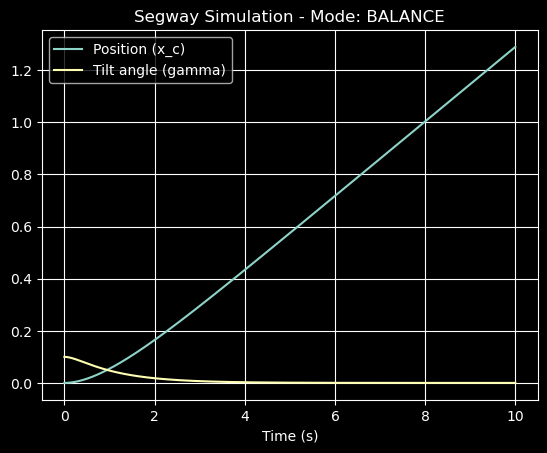

In [81]:
from Segway_model_withControl import Segway_model_withControl, Mode
from Segway_model_withControl import params

params.K_gamma = 6.0
params.K_dgamma = 1

Segway_model_withControl.simulate(z0=[0.0, 0.0, 0.1, 0.0], t_span=(0, 10), mode=Mode.BALANCE); # let initial gamma be 0.1 rad to see the balancing behavior

# Although during the linerization process, we assumed \gamma to be round \pi, but the controller works works on the expansion from pi, which means that the z[3] is the deviation of gamma from pi, so we can set the initial gamma to be round pi, and the controller will work as well.

We can see from the graph that if $\gamma$ is a small value, the control can successfully stabilize the angle of $\gamma$ to zero. For the velocity, as $\gamma \neq 0$, the center of mass is not perfectly above the wheel, thus the velocity will not be stabilized to zero. In balance mode, the controller only focuses on stabilizing the angle of $\gamma$, so the wheel will keep going forward even after the angle of $\gamma$ is stabilized to zero. This is based on the assumption of no friction. (I adjusted the parameters for the system though, to make it look better.)

- In velocity mode:

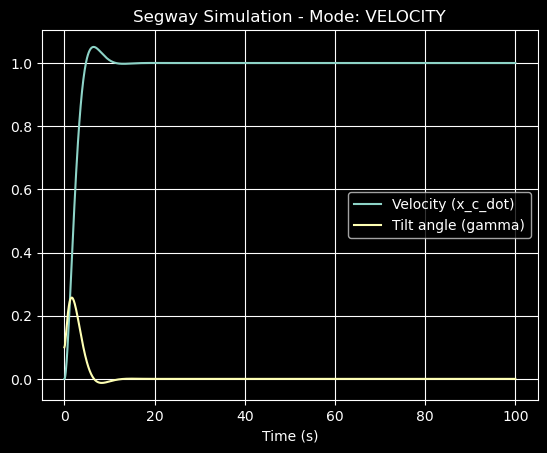

In [97]:
from Segway_model_withControl import Segway_model_withControl, Mode
from Segway_model_withControl import params

params.K_gamma = 6.0
params.K_dgamma = 1
params.K_velocity = 0.3

Segway_model_withControl.simulate(z0=[0.0, 0.0, 0.1, 0.0], desired_gamma=0.0, desired_velocity=1.0, t_span=(0, 100), mode=Mode.VELOCITY); 

- In position mode: 

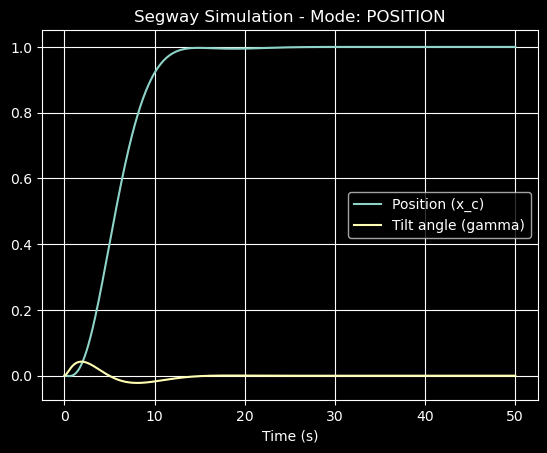

In [104]:
from Segway_model_withControl import Segway_model_withControl, Mode
from Segway_model_withControl import params

params.K_gamma = 6.0
params.K_dgamma = 1
params.K_velocity = 0.3
params.K_position = 0.05

Segway_model_withControl.simulate(z0=[0.0, 0.0, 0.0, 0.0], desired_gamma=0.0, desired_velocity=0.0, desired_position=1.0, t_span=(0, 50), mode=Mode.POSITION); 